In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [2]:
data = pd.read_csv("../data/crabs.csv") 
data.head(2)

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4

In [3]:
# Sélection des variables quantitatives et conversion en forme verticale
x = data.iloc[:,4:9].values

In [5]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [6]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)

In [7]:
# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

In [9]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)
pca

PCA(n_components=2)

In [10]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [11]:
# Visualisation de la matrice dans le nouveau repére
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         4.927573        -0.268445
1         4.386176        -0.094074

In [12]:
# Constitution de la matrice finale avec la variable qualitative sp
# axis : {0/’index’, 1/’columns’}, default 0

finaldf = pd.concat([principaldf, data[['sp']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 sp
0         4.927573        -0.268445  B
1         4.386176        -0.094074  B

In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

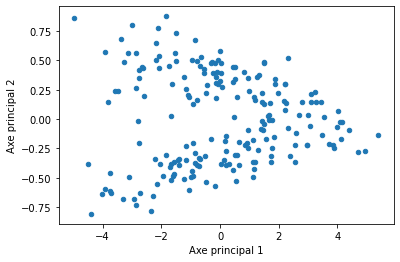

In [21]:
# Première représentation graphique sans distinction des variables qualitatives
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

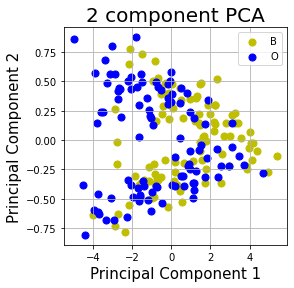

In [22]:
# Visualisation de la matrice avec prise en compte de la variable qualitative sp
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B','O']
colors = ['y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sp'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
# Constitution de la matrice finale avec la variable qualitative sp
# axis : {0/’index’, 1/’columns’}, default 0

finaldf2 = pd.concat([principaldf, data[['sex']]], axis = 1)
finaldf2.head(2)

Axe principal 1  Axe principal 2 sex
0         4.927573        -0.268445   M
1         4.386176        -0.094074   M

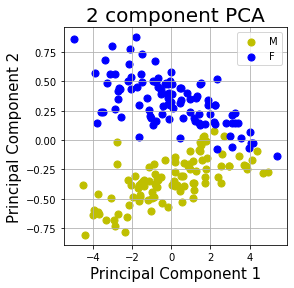

In [25]:
# Visualisation de la matrice avec prise en compte de la variable qualitative sex
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M','F']
colors = ['y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf2['sex'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [26]:
# Modèle représentatif car couvert à plus de 95%
pca.explained_variance_ratio_

array([0.95776696, 0.03033704])

In [27]:
#Création de la colonne CAT qui permet de croiser les deux variables qualitatives sp et sex
data['CAT'] = np.where((data.sex=='F') & (data.sp =='O'), 'FO', (np.where((data.sex=='F') & (data.sp =='B'),'FB',(np.where((data.sex=='M') & (data.sp =='B'),'MB',(np.where((data.sex=='M') & (data.sp =='O'),'MO','N')))))))

In [28]:
#Verifions sa création
data.head(2)

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD CAT
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0  MB
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4  MB

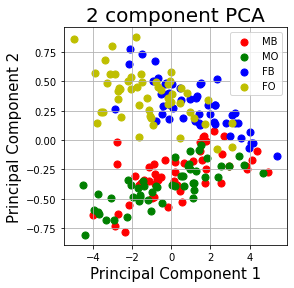

In [29]:
# Visualisation de la matrice avec prise en compte des deux variables qualitatives sp et sex
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['MB','MO','FB','FO']
colors = ['r', 'g','b','y']
for target, color in zip(targets,colors):
    indicesToKeep = data['CAT'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Utilisation de sklearn pour l'étude des variables et individus

In [30]:
import sklearn

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

In [34]:
#On standardise les données
Z2 = sc.fit_transform(x)
Z2

array([[-2.14623182e+00, -2.35244988e+00, -2.25392649e+00,
        -2.21777180e+00, -2.05798865e+00],
       [-1.94546178e+00, -1.96287468e+00, -1.97228249e+00,
        -1.98853816e+00, -1.94089947e+00],
       [-1.83073603e+00, -1.92391716e+00, -1.84554270e+00,
        -1.78477492e+00, -1.85308259e+00],
       [-1.71601029e+00, -1.88495963e+00, -1.69063850e+00,
        -1.69562851e+00, -1.70672111e+00],
       [-1.65864742e+00, -1.84600211e+00, -1.66247410e+00,
        -1.70836371e+00, -1.70672111e+00],
       [-1.37183306e+00, -1.45642691e+00, -1.28225470e+00,
        -1.26263163e+00, -1.23836441e+00],
       [-1.28578876e+00, -1.10580922e+00, -1.16959711e+00,
        -1.18622042e+00, -1.23836441e+00],
       [-1.14238158e+00, -1.41746939e+00, -1.07102171e+00,
        -1.02066279e+00, -1.06273064e+00],
       [-1.08501871e+00, -1.22268178e+00, -1.11326831e+00,
        -1.09707400e+00, -1.26763670e+00],
       [-1.08501871e+00, -8.72064099e-01, -9.72446308e-01,
        -9.06045967e-01

In [35]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

5


In [36]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval)

[4.78883478e+00 1.51685207e-01 4.66329741e-02 1.11353571e-02
 1.71167766e-03]


In [37]:
#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.9577669568722968, 0.030337041349040424, 0.009326594818043316, 0.0022270714294888366, 0.00034233553113074776]


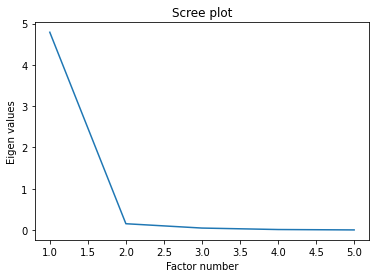

In [38]:
#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

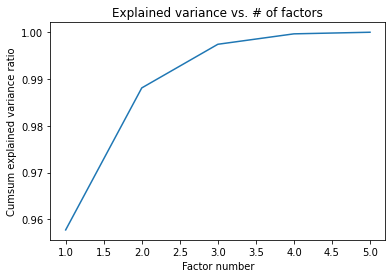

In [39]:
#cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [41]:
bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
bs

array([2.28333333, 1.28333333, 0.78333333, 0.45      , 0.2       ])

In [42]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.788835  2.283333
1    0.151685  1.283333
2    0.046633  0.783333
3    0.011135  0.450000
4    0.001712  0.200000


__Représentation des individus__

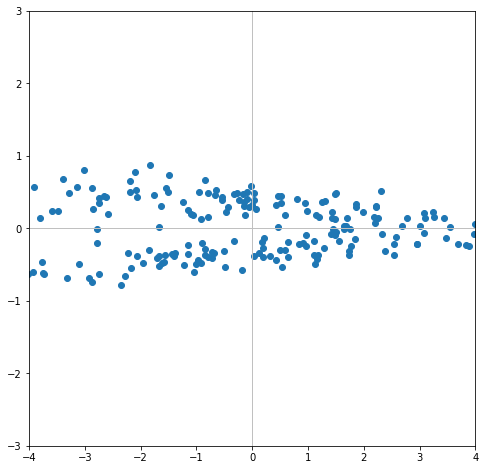

In [43]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
#for i in range(200):
     #plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
    #Vous pouvez activer les étiquettes mais ça reste encombrant
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [44]:
#contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

      ID        d_i
0      0  24.374345
1      1  19.248972
2      2  17.078416
3      3  15.144076
4      4  14.754059
..   ...        ...
195  195  12.046593
196  196  12.335237
197  197  13.008286
198  198  14.610705
199  199  25.516208

[200 rows x 2 columns]


In [45]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.996169  0.002957
1      1  0.999458  0.000460
2      2  0.998094  0.001670
3      3  0.995966  0.003996
4      4  0.996334  0.003406
..   ...       ...       ...
195  195  0.954457  0.038556
196  196  0.986224  0.004797
197  197  0.988669  0.004409
198  198  0.990310  0.001491
199  199  0.970438  0.029305

[200 rows x 3 columns]


In [46]:
#contributions aux axes
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(200*eigval[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.025352  0.002375
1      1  0.020087  0.000292
2      2  0.017798  0.000940
3      3  0.015748  0.001995
4      4  0.015348  0.001656
..   ...       ...       ...
195  195  0.012005  0.015310
196  196  0.012702  0.001951
197  197  0.013428  0.001891
198  198  0.015107  0.000718
199  199  0.025854  0.024648

[200 rows x 3 columns]


__Représentation des variables__

In [47]:
#le champ components_ de l'objet ACP (les vecteurs propres)
print(acp.components_)

[[-0.45204368 -0.42807736 -0.45319102 -0.45111272 -0.45113358]
 [-0.13758126  0.89813071 -0.26823815 -0.18059588 -0.26432187]
 [-0.53076841  0.01197915  0.30968155  0.65256956 -0.44316103]
 [ 0.69692337 -0.0837032  -0.00144463  0.08918782 -0.70663642]
 [ 0.09649156 -0.05441759 -0.79168267  0.57452672  0.17574331]]


In [49]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
sqrt_eigval

array([2.18834065, 0.38946785, 0.21594669, 0.1055242 , 0.04137243])

In [50]:
#corrélation des variables avec les axes
corvar = np.zeros((5,5))
for k in range(5):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[-9.89225553e-01 -5.35834770e-02 -1.14617683e-01  7.35422825e-02
   3.99208978e-03]
 [-9.36779085e-01  3.49793038e-01  2.58685744e-03 -8.83271371e-03
  -2.25138779e-03]
 [-9.91736320e-01 -1.04470135e-01  6.68747067e-02 -1.52443702e-04
  -3.27538329e-02]
 [-9.87188293e-01 -7.03362873e-02  1.40920239e-01  9.41147313e-03
   2.37695642e-02]
 [-9.87233956e-01 -1.02944869e-01 -9.56991586e-02 -7.45672444e-02
   7.27092696e-03]]


In [52]:
#Afin de récupérer les noms de variables quantitatives (FL,RW,CL,CW et BD)
D=data[data.columns[4:9]]
D

FL    RW    CL    CW    BD
0     8.1   6.7  16.1  19.0   7.0
1     8.8   7.7  18.1  20.8   7.4
2     9.2   7.8  19.0  22.4   7.7
3     9.6   7.9  20.1  23.1   8.2
4     9.8   8.0  20.3  23.0   8.2
..    ...   ...   ...   ...   ...
195  21.4  18.0  41.2  46.2  18.7
196  21.7  17.1  41.7  47.2  19.6
197  21.9  17.2  42.6  47.4  19.5
198  22.5  17.2  43.0  48.7  19.8
199  23.1  20.2  46.2  52.5  21.1

[200 rows x 5 columns]

In [53]:
#on affiche les corrélation variables-axes pour les deux premiers axes
print(pd.DataFrame({'id':D.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

   id     COR_1     COR_2
0  FL -0.989226 -0.053583
1  RW -0.936779  0.349793
2  CL -0.991736 -0.104470
3  CW -0.987188 -0.070336
4  BD -0.987234 -0.102945


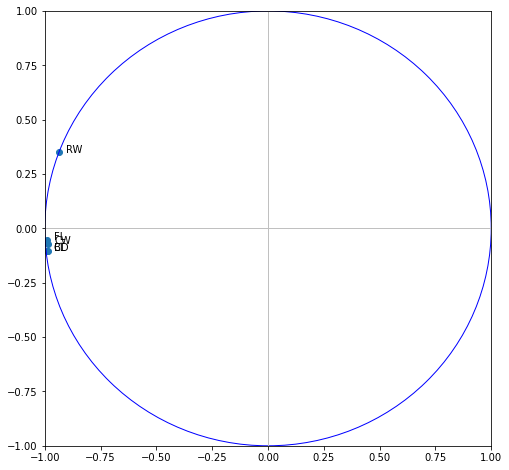

In [54]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(D.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [55]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':D.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

   id    COS2_1    COS2_2
0  FL  0.978567  0.002871
1  RW  0.877555  0.122355
2  CL  0.983541  0.010914
3  CW  0.974541  0.004947
4  BD  0.974631  0.010598
